# A Visual History of Nobel Prize Winners



The Nobel Prize is perhaps the world's most well known scientific award. Every year it is given to scientists and scholars in chemistry, literature, physics, medicine, economics, and peace. In this project, we aim at exploring patterns and trends in over 100 years worth of Nobel Prize winners.

Specifically, we try to answer the following questions:

1. Who gets the Nobel Prize?
2. What is the gender of a typical Nobel Prize winner?
   (Males count vs. Females count)
3. Dominant country in each field?
4. USA dominance, visualized
5. Capitals dominance vs. non-capitals
6. The first woman to win the Nobel Prize
7. Organizations vs. Individuals
8. Oldest and youngest winners
9. Age differences between prize categories

The dataset we use can be found on kaggle: https://www.kaggle.com/nobelfoundation/nobel-laureates

## 1. Data Cleaning & Transformations:

We start by inspecting the data and cleaning it. We will have a look at the missing values, the noisy values and try to clean the data as much as possible. We as well will perform some transformations and pre-processing on the data so as to serve answering our target questions.

In [44]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [45]:
#Inspecting the data
nobel_data = pd.read_csv("Data - Nobel Prize Laureates.csv")
nobel_data.sample(10)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
671,1994,Physics,The Nobel Prize in Physics 1994,"""for pioneering contributions to the developme...",1/2,145,Individual,Bertram N. Brockhouse,1918-07-15,"Lethbridge, Alberta",Canada,Male,McMaster University,"Hamilton, Ontario",Canada,2003-10-13,"Hamilton, Ontario",Canada
861,2009,Medicine,The Nobel Prize in Physiology or Medicine 2009,"""for the discovery of how chromosomes are prot...",1/3,835,Individual,Elizabeth H. Blackburn,1948-11-26,"Hobart, Tasmania",Australia,Female,University of California,"San Francisco, CA",United States of America,NaN,NaN,NaN
298,1954,Physics,The Nobel Prize in Physics 1954,"""for the coincidence method and his discoverie...",1/2,62,Individual,Walther Bothe,1891-01-08,Oranienburg,Germany,Male,Max-Planck-Institut für medizinische Forschung,Heidelberg,Federal Republic of Germany,1957-02-08,Heidelberg,West Germany (Germany)
632,1990,Physics,The Nobel Prize in Physics 1990,"""for their pioneering investigations concernin...",1/3,138,Individual,Jerome I. Friedman,1930-03-28,"Chicago, IL",United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,NaN,NaN,NaN
305,1956,Chemistry,The Nobel Prize in Chemistry 1956,"""for their researches into the mechanism of ch...",1/2,220,Individual,Nikolay Nikolaevich Semenov,1896-04-03,Saratov,Russia,Male,Institute for Chemical Physics of the Academy ...,Moscow,Union of Soviet Socialist Republics,1986-09-25,Moscow,Union of Soviet Socialist Republics
484,1976,Medicine,The Nobel Prize in Physiology or Medicine 1976,"""for their discoveries concerning new mechanis...",1/2,409,Individual,Baruch S. Blumberg,1925-07-28,"New York, NY",United States of America,Male,The Institute for Cancer Research,"Philadelphia, PA",United States of America,2011-04-05,"Moffett Field, CA",United States of America
150,1929,Peace,The Nobel Peace Prize 1929,NaN,1/1,494,Individual,Frank Billings Kellogg,1856-12-22,"Potsdam, NY",United States of America,Male,NaN,NaN,NaN,1937-12-21,"St. Paul, MN",United States of America
80,1914,Chemistry,The Nobel Prize in Chemistry 1914,"""in recognition of his accurate determinations...",1/1,175,Individual,Theodore William Richards,1868-01-31,"Germantown, PA",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,1928-04-02,"Cambridge, MA",United States of America
341,1960,Medicine,The Nobel Prize in Physiology or Medicine 1960,"""for discovery of acquired immunological toler...",1/2,370,Individual,Peter Brian Medawar,1915-02-28,Rio de Janeiro,Brazil,Male,University College,London,United Kingdom,1987-10-02,London,United Kingdom
650,1993,Chemistry,The Nobel Prize in Chemistry 1993,"""for contributions to the developments of meth...",1/2,278,Individual,Kary B. Mullis,1944-12-28,"Lenoir, NC",United States of America,Male,NaN,"La Jolla, CA",United States of America,NaN,NaN,NaN


**Unique Values and Duplicate Records:**    
We will take a look at the number of unique values in each column and checkout the shape of the dataset. The ID column should be unique, that means that the number of rows must be the same as the number of unique values in ID column.

In [46]:
#print number of rows by number of columns
nobel_data.shape

(969, 18)

In [47]:
#print the count of unique values in each column
nobel_data.nunique()

Year                    113
Category                  6
Prize                   579
Motivation              565
Prize Share               4
Laureate ID             904
Laureate Type             2
Full Name               904
Birth Date              868
Birth City              601
Birth Country           121
Sex                       2
Organization Name       315
Organization City       186
Organization Country     29
Death Date              582
Death City              291
Death Country            50
dtype: int64

We realise there are 969 records in the data, however there are only 904 IDs. This indicates we have duplicate records that need to be eliminated. We shall use pandas' drop_duplicates method and make sure that the number of records matches the number of unique IDs then.

In [48]:
#based on the ID column, drop duplicates keeping only the first occurence
nobel_no_dup = nobel_data.drop_duplicates(subset='Laureate ID', keep='first')

#check that the number of records is now the same as the number of unique IDs
nobel_no_dup.shape

(904, 18)

**Missing Values Analysis and Imputation:**    
We will now analyze the missing values and try to derive conclusions about what are plausible values and techniques to impute with, and what values can be manually filled using the internet.

In [49]:
#Check the missing values in the dataset
# get the number of missing data points per column
missing_values = nobel_no_dup.isnull().sum()

# We want to check the percentage of the missing values.
#Therefore we get the number of missing values and number of total cells to calculate %
total_cells = np.product(nobel_no_dup.shape) 
total_missing_cells = missing_values.sum()

# percent of data that is missing
percentage_missing_values = (total_missing_cells/total_cells) * 100
percentage_missing_values = '%.2f' % percentage_missing_values
print("Missing Data Percentage: " + str(percentage_missing_values) + "%")

Missing Data Percentage: 11.54%


Having calculated the percentage of the missing data, we can't simply drop the records with missing values since the percentage exceeds the safe zone (2-3%). Therefore, further analysis of the missing values is needed. We will start by looking at the "Laureate Type" column.  


In [50]:
#check the different values in the column along with their counts
nobel_no_dup['Laureate Type'].value_counts()

Individual      877
Organization     27
Name: Laureate Type, dtype: int64

We note that there are two unique values for the "Laureate Type" column: Individual and Organization. We also note that most of the records are individuals vs, very small % which are organizations. It is particularly interesting to look at the demographics data of the organization records.

In [51]:
#get only records of type organization
org = nobel_no_dup.loc[nobel_no_dup['Laureate Type'] == "Organization"]
org

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,1965,Peace,The Nobel Peace Prize 1965,NaN,1/1,525,Organization,United Nations Children's Fund (UNICEF),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,1969,Peace,The Nobel Peace Prize 1969,NaN,1/1,527,Organization,International Labour Organization (I.L.O.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We note that all the organization records have NaN values for the demographic columns, except for some records such as Mother Teresa who have demographic data and were mistakenly recorded as organizations. We will identify these values and correct them. And we also decide not to impute the missing demographic values for the organization records, since it makes sense that this data is Nan, and more importantly since we don't need it in answering any of our target analysis questions indicated at the top of the notebook.

In [52]:
#identify records who are labeled as organization but have a birth date which is not nan
isOrg = nobel_no_dup['Laureate Type'] == "Organization"
isBD = pd.notna(nobel_no_dup['Birth Date'])
mask = isOrg & isBD

#change the laureate type of these records to be individual
#run twice to suppress the warning
#nobel_no_dup.loc[ mask, 'Laureate Type'] = "Individual"

df = nobel_no_dup.loc[mask].copy()
df['Laureate Type'] = "Individual"
nobel1 = nobel_no_dup.drop(nobel_no_dup.loc[ mask].index, axis=0)
nobel1 = pd.concat([nobel1, df], axis=0)
nobel1.shape

(904, 18)

Now we check records which are labeled organization, and expect all of them to be actual organizations.

In [53]:
#get only records of type organization
org = nobel1.loc[nobel1['Laureate Type'] == "Organization"]
org

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,Organization,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,NaN,1/1,477,Organization,Bureau international permanent de la Paix (Per...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,NaN,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,508,Organization,Friends Service Council (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,1947,Peace,The Nobel Peace Prize 1947,NaN,1/2,509,Organization,American Friends Service Committee (The Quakers),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,1965,Peace,The Nobel Peace Prize 1965,NaN,1/1,525,Organization,United Nations Children's Fund (UNICEF),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,1969,Peace,The Nobel Peace Prize 1969,NaN,1/1,527,Organization,International Labour Organization (I.L.O.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Also check records which are labeled as organization but have a birth date, and expect that none exist anymore.

In [54]:
isOrg = nobel1['Laureate Type'] == "Organization"
isBD = pd.notna(nobel1['Birth Date'])
mask = isOrg & isBD
nobel1.loc[isOrg & isBD]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country


Now all is good concerning the organizations. Now we want to analyze the individuals and their missing values. First, we group only the individual records, then display the count of missing values in each column.

In [55]:
#get only records of type individual
ind = nobel1.loc[nobel1['Laureate Type'] == "Individual"]
ind.sample(10)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
647,1992,Peace,The Nobel Peace Prize 1992,"""in recognition of her work for social justice...",1/1,554,Individual,Rigoberta Menchú Tum,1959-01-09,Aldea Chimel,Guatemala,Female,NaN,NaN,NaN,NaN,NaN,NaN
726,1999,Medicine,The Nobel Prize in Physiology or Medicine 1999,"""for the discovery that proteins have intrinsi...",1/1,461,Individual,Günter Blobel,1936-05-21,Waltersdorf (Niegoslawice),Germany (Poland),Male,Rockefeller University,"New York, NY",United States of America,NaN,NaN,NaN
735,2000,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his development of theory and methods for...",1/2,733,Individual,Daniel L. McFadden,1937-07-29,"Raleigh, NC",United States of America,Male,University of California,"Berkeley, CA",United States of America,NaN,NaN,NaN
659,1993,Physics,The Nobel Prize in Physics 1993,"""for the discovery of a new type of pulsar, a ...",1/2,143,Individual,Russell A. Hulse,1950-11-28,"New York, NY",United States of America,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN
916,2013,Chemistry,The Nobel Prize in Chemistry 2013,"""for the development of multiscale models for ...",1/3,890,Individual,Michael Levitt,1947-05-09,Pretoria,South Africa,Male,Stanford University School of Medicine,"Stanford, CA",United States of America,NaN,NaN,NaN
564,1984,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having made fundamental contributions to ...",1/1,698,Individual,Richard Stone,1913-08-30,London,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,1991-12-06,Cambridge,United Kingdom
938,2014,Medicine,The Nobel Prize in Physiology or Medicine 2014,"""for their discoveries of cells that constitut...",1/4,905,Individual,Edvard I. Moser,1962-04-27,Ålesund,Norway,Male,Norwegian University of Science and Technology...,Trondheim,Norway,NaN,NaN,NaN
644,1992,Literature,The Nobel Prize in Literature 1992,"""for a poetic oeuvre of great luminosity, sust...",1/1,669,Individual,Derek Walcott,1930-01-23,Castries,Saint Lucia,Male,NaN,NaN,NaN,NaN,NaN,NaN
214,1943,Chemistry,The Nobel Prize in Chemistry 1943,"""for his work on the use of isotopes as tracer...",1/1,201,Individual,George de Hevesy,1885-08-01,Budapest,Austria-Hungary (Hungary),Male,Stockholm University,Stockholm,Sweden,1966-07-05,Freiburg im Breisgau,West Germany (Germany)
805,2005,Medicine,The Nobel Prize in Physiology or Medicine 2005,"""for their discovery of the bacterium <i>Helic...",1/2,789,Individual,Barry J. Marshall,1951-09-30,Kalgoorlie,Australia,Male,"NHMRC Helicobacter pylori Research Laboratory,...",Nedlands,Australia,NaN,NaN,NaN


In [56]:
#get missing values count in individual records
ind_missing_values = ind.isnull().sum()
ind_missing_values

Year                      0
Category                  0
Prize                     0
Motivation               71
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date                2
Birth City                2
Birth Country             0
Sex                       0
Organization Name       220
Organization City       218
Organization Country    218
Death Date              292
Death City              309
Death Country           303
dtype: int64

Now we observe very interesting patterns in our data. We note that the birth date and the birth country have only two missing values which we can identify and fill manually.  
We also note that we have large number of missing values for the organization name, organization city and organization country. This is most probably due to some individuals not belonging to any organization like Naguib Mahfouz for example. We also note that there exists large number of missing values for death date, death city and death country. This is probably due to some people being still alive.    
Since the death dates and the organizations don't matter much to our proposed question, we decide to keep them as NaNs since this is normal: if someone didn't die yet, his death date is not a missing value, the record can still be considered complete then.   
We focus however on identifying the 2 missing values for "Birth Date" and "Birth City", since they are important to our analysis.

In [57]:
#get records who are individuals and their birth city is NaN
isInd = nobel1['Laureate Type'] == "Individual"
isCityNan = pd.isna(nobel1['Birth City'])

nobel1.loc[isInd & isCityNan]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
750,2001,Literature,The Nobel Prize in Literature 2001,"""for having united perceptive narrative and in...",1/1,747,Individual,Sir Vidiadhar Surajprasad Naipaul,1932-08-17,NaN,Trinidad,Male,NaN,NaN,NaN,NaN,NaN,NaN
880,2010,Peace,The Nobel Peace Prize 2010,"""for his long and non-violent struggle for fun...",1/1,855,Individual,Liu Xiaobo,1955-12-28,NaN,China,Male,NaN,NaN,NaN,NaN,NaN,NaN


Now that we identified the 2 records whose birth city is Nan, we fill them up manually. Using the internet we get that the birth city of Sir Vidiadhar Surajprasad Naipaul is Chaguanas, and the birth city of Liu Xiaobo is Changchun. We fill them out manually.

In [58]:
nobel1.loc[nobel1['Full Name'] == "Sir Vidiadhar Surajprasad Naipaul", 'Birth City'] = "Chaguanas"
nobel1.loc[nobel1['Full Name'] == "Liu Xiaobo", 'Birth City'] = "Changchun"


In [59]:
#get records who are individuals and their birth date is NaN
isInd = nobel1['Laureate Type'] == "Individual"
isBDNan = pd.isna(nobel1['Birth Date'])

nobel1.loc[isInd & isBDNan]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
853,2009,Chemistry,The Nobel Prize in Chemistry 2009,"""for studies of the structure and function of ...",1/3,841,Individual,Venkatraman Ramakrishnan,NaN,"Chidambaram, Tamil Nadu",India,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,NaN,NaN,NaN
894,2011,Physics,The Nobel Prize in Physics 2011,"""for the discovery of the accelerating expansi...",1/2,864,Individual,Saul Perlmutter,NaN,"Champaign-Urbana, IL",United States of America,Male,Lawrence Berkeley National Laboratory,"Berkeley, CA",United States of America,NaN,NaN,NaN


Also using the internet we get that the birth date of Venkatraman Ramakrishnan is 1 April 1952, and the birth date of Saul Perlmutter is 22 September 1959. We as well fill them manually. We first however inspect the type of the date column.

In [60]:
nobel1.loc[nobel1['Full Name'] == "Venkatraman Ramakrishnan", 'Birth Date'] = '1952-1-4'
nobel1.loc[nobel1['Full Name'] == "Saul Perlmutter", 'Birth Date'] = '1959-22-9'


Now we check the missing values in individuals. We expect not to have any missing values in birth date and birth city.

In [61]:
ind = nobel1.loc[nobel1['Laureate Type'] == "Individual"]
#get missing values count in individual records
ind_missing_values = ind.isnull().sum()
ind_missing_values

Year                      0
Category                  0
Prize                     0
Motivation               71
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date                0
Birth City                0
Birth Country             0
Sex                       0
Organization Name       220
Organization City       218
Organization Country    218
Death Date              292
Death City              309
Death Country           303
dtype: int64

As for the motivation column, we need it to get insights about who gets the nobel prize (see our analysis questions at the top of the notebook), we might get the most repeated words for this task or something similar. For this, we don't need all the values to be there and we also find it infeasible to manually fill them or to impute them with the most frequent value (since they are non numeric), therefore we keep this column as it is and later on see how we can benefit from it. 

Now since our target questions requires some answers about the age of the individuals when they accquired the prize, we find it beneficial to add an age column using the birth date and the year of the prize. We first check the type of the date column, and try to extract the year from it.

In [62]:
#check the data type of each column
nobel1.dtypes

Year                     int64
Category                object
Prize                   object
Motivation              object
Prize Share             object
Laureate ID              int64
Laureate Type           object
Full Name               object
Birth Date              object
Birth City              object
Birth Country           object
Sex                     object
Organization Name       object
Organization City       object
Organization Country    object
Death Date              object
Death City              object
Death Country           object
dtype: object

We notice that the "Birth Date" column is of type string instead of type datetime, therefore we try to typecast it using pandas' to_datetime

In [63]:
#nobel1['Birth Date'] = pd.to_datetime(nobel1['Birth Date'])

#when running the commented line above we get this error:
#ValueError: month must be in 1..12


The above error means that the dates are having inconsistent format. Since we are only interested in the year, we perform string manipulation in order to extract the year, then parse it into an integer. We will then subtract the prize date from the birth date to accquire the age column that we need.

In [64]:
#get organization records alone
org = nobel1.loc[nobel1['Laureate Type'] == "Organization"]
#get individual records alone
ind = nobel1.loc[nobel1['Laureate Type'] == "Individual"]

#split the date using "-" and store the result in 3 columns in a new dataframe df
df = pd.DataFrame()
df[ ['1','2','3'] ] = ind['Birth Date'].str.split("-", expand=True)
#the year is stored in the first column
df['Birth Year'] = df['1']
#drop 1,2,3 and keep year only
df = df.drop(['1', '2', '3'], axis=1)

#Now we make sure that the year is assigned correctly
#we do this by trying to print all values of Birth Year whose length is not =4, this should be false
df.loc[df['Birth Year'].str.len() != 4]

,Birth Year


Now that we extracted the year correctly, we proceed to modifying the ind dataframe and the org accordingly, and concatenate them.

In [65]:
#concat the year to the ind dataframe 

ind = pd.concat([ ind.iloc[: , 0:11], df, ind.iloc[: , 11:] ], axis=1)
ind['Birth Year'] = ind['Birth Year'].astype(int)

#calculate the age as the difference between year of prize and birth year
ind['Age'] = ind['Year'] - ind['Birth Year']

#add a zero value for the age of organization records so as to concatenate both into integers
#org.insert(0, 'Age', 0)

#we won't add zero for the age of organization and prefer to keep it as Nan and keep the birth year as float instead

#form the nobel_no_dup as the concatentation of the modified ind and the ord
nobel2 = pd.concat([ind,org], axis=0, sort=False)

#reorder the columns, make age with birth year
cols = nobel2.columns.tolist()
cols_ord = cols[0:12] + cols[19:20] + cols[12:19]
nobel3 = nobel2[cols_ord] 
nobel3

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Birth Year,Age,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,1852.0,49.0,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,1839.0,62.0,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),1854.0,47.0,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,1828.0,73.0,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,1822.0,79.0,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,2006,Peace,The Nobel Peace Prize 2006,"""for their efforts to create economic and soci...",1/2,810,Organization,Grameen Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833,2007,Peace,The Nobel Peace Prize 2007,"""for their efforts to build up and disseminate...",1/2,818,Organization,Intergovernmental Panel on Climate Change (IPCC),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,2012,Peace,The Nobel Peace Prize 2012,"""for over six decades contributed to the advan...",1/1,881,Organization,European Union (EU),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,2013,Peace,The Nobel Peace Prize 2013,"""for its extensive efforts to eliminate chemic...",1/1,893,Organization,Organisation for the Prohibition of Chemical W...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now examining the "Laureate Type" column, it has only two values: Individual and Organization. Therefore we find it convenient to encode it into binary integers (0/1) in order to make it easier to handle.

In [66]:
nobel3["Laureate Type"] = nobel3["Laureate Type"].astype('category')
nobel3["Laureate Type"] = nobel3["Laureate Type"].cat.codes
nobel3

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Birth Year,Age,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,0,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,1852.0,49.0,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,0,Sully Prudhomme,1839-03-16,Paris,France,1839.0,62.0,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,0,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),1854.0,47.0,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,0,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,1828.0,73.0,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,0,Frédéric Passy,1822-05-20,Paris,France,1822.0,79.0,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,2006,Peace,The Nobel Peace Prize 2006,"""for their efforts to create economic and soci...",1/2,810,1,Grameen Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833,2007,Peace,The Nobel Peace Prize 2007,"""for their efforts to build up and disseminate...",1/2,818,1,Intergovernmental Panel on Climate Change (IPCC),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,2012,Peace,The Nobel Peace Prize 2012,"""for over six decades contributed to the advan...",1/1,881,1,European Union (EU),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,2013,Peace,The Nobel Peace Prize 2013,"""for its extensive efforts to eliminate chemic...",1/1,893,1,Organisation for the Prohibition of Chemical W...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We try to encode the "Sex" column as well, it consists of only 2 values: Male and Female. The problem is there is Nan values in this column for the organization records. Therefore we make a dictionary and map the values instead of using .cat.codes.

In [67]:
#create the dictionary
dict = {'Male' : 0, 'Female' : 1} 

#convert it into categorical
nobel3["Sex"] = nobel3["Sex"].astype('category')  

#Remap the values of the dataframe 
nobel3["Sex"] = nobel3["Sex"].map(dict)

nobel3.sample(10)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Birth Year,Age,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
72,1912,Medicine,The Nobel Prize in Physiology or Medicine 1912,"""in recognition of his work on vascular suture...",1/1,306,0,Alexis Carrel,1873-06-28,Sainte-Foy-lès-Lyon,France,1873.0,39.0,0,Rockefeller Institute for Medical Research,"New York, NY",United States of America,1944-11-05,Paris,France
660,1993,Physics,The Nobel Prize in Physics 1993,"""for the discovery of a new type of pulsar, a ...",1/2,144,0,Joseph H. Taylor Jr.,1941-03-29,"Philadelphia, PA",United States of America,1941.0,52.0,0,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN
905,2012,Literature,The Nobel Prize in Literature 2012,"""who with hallucinatory realism merges folk ta...",1/1,880,0,Mo Yan,1955-02-02,Gaomi,China,1955.0,57.0,0,NaN,NaN,NaN,NaN,NaN,NaN
686,1996,Chemistry,The Nobel Prize in Chemistry 1996,"""for their discovery of fullerenes""",1/3,285,0,Sir Harold W. Kroto,1939-10-07,Wisbech,United Kingdom,1939.0,57.0,0,University of Sussex,Brighton,United Kingdom,2016-04-30,"Lewes, East Sussex",United Kingdom
405,1968,Medicine,The Nobel Prize in Physiology or Medicine 1968,"""for their interpretation of the genetic code ...",1/3,390,0,Marshall W. Nirenberg,1927-04-10,"New York, NY",United States of America,1927.0,41.0,0,National Institutes of Health,"Bethesda, MD",United States of America,2010-01-15,"New York, NY",United States of America
883,2011,Chemistry,The Nobel Prize in Chemistry 2011,"""for the discovery of quasicrystals""",1/1,867,0,Dan Shechtman,1941-01-24,Tel Aviv,British Mandate of Palestine (Israel),1941.0,70.0,0,Technion - Israel Institute of Technology,Haifa,Israel,NaN,NaN,NaN
100,1920,Medicine,The Nobel Prize in Physiology or Medicine 1920,"""for his discovery of the capillary motor regu...",1/1,310,0,Schack August Steenberg Krogh,1874-11-15,Grenå,Denmark,1874.0,46.0,0,Copenhagen University,Copenhagen,Denmark,1949-09-13,Copenhagen,Denmark
24,1904,Peace,The Nobel Peace Prize 1904,NaN,1/1,467,1,Institut de droit international (Institute of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
484,1976,Medicine,The Nobel Prize in Physiology or Medicine 1976,"""for their discoveries concerning new mechanis...",1/2,409,0,Baruch S. Blumberg,1925-07-28,"New York, NY",United States of America,1925.0,51.0,0,The Institute for Cancer Research,"Philadelphia, PA",United States of America,2011-04-05,"Moffett Field, CA",United States of America
638,1991,Medicine,The Nobel Prize in Physiology or Medicine 1991,"""for their discoveries concerning the function...",1/2,444,0,Erwin Neher,1944-03-20,Landsberg,Germany,1944.0,47.0,0,Max-Planck-Institut für Biophysikalische Chemie,Göttingen,Federal Republic of Germany,NaN,NaN,NaN


For the "Category" column, we will examine its unique values and see what we can do with them:

In [68]:
nobel3['Category'].value_counts()

Medicine      211
Physics       203
Chemistry     173
Peace         126
Literature    113
Economics      78
Name: Category, dtype: int64

We notice that we have only 6 different values. We will try to encode them in order to get rid of the strings. Since there is no notion of ordering among the values, encoding them into numeric values seems to be a bad idea. Instead, we use one hot encoding.

In [69]:
#first we label them using numerical encoding

from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

nobel3['Category'] = labelEncoder.fit_transform(nobel3['Category'])

nobel3.sample(10)


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Birth Year,Age,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
426,1970,5,The Nobel Prize in Physics 1970,"""for fundamental work and discoveries concerni...",1/2,92,0,Louis Eugène Félix Néel,1904-11-22,Lyon,France,1904.0,66.0,0,University of Grenoble,Grenoble,France,2000-11-17,Brive-Corrèze,France
408,1969,0,The Nobel Prize in Chemistry 1969,"""for their contributions to the development of...",1/2,237,0,Derek H. R. Barton,1918-09-08,Gravesend,United Kingdom,1918.0,51.0,0,Imperial College,London,United Kingdom,1998-03-16,"College Station, TX",United States of America
794,2004,3,The Nobel Prize in Physiology or Medicine 2004,"""for their discoveries of odorant receptors an...",1/2,775,0,Linda B. Buck,1947-01-29,"Seattle, WA",United States of America,1947.0,57.0,1,Fred Hutchinson Cancer Research Center,"Seattle, WA",United States of America,NaN,NaN,NaN
556,1983,0,The Nobel Prize in Chemistry 1983,"""for his work on the mechanisms of electron tr...",1/1,260,0,Henry Taube,1915-11-30,Neudorf,Canada,1915.0,68.0,0,Stanford University,"Stanford, CA",United States of America,2005-11-16,"Stanford, CA",United States of America
126,1925,5,The Nobel Prize in Physics 1925,"""for their discovery of the laws governing the...",1/2,30,0,James Franck,1882-08-26,Hamburg,Germany,1882.0,43.0,0,Goettingen University,Göttingen,Germany,1964-05-21,Göttingen,West Germany (Germany)
156,1930,5,The Nobel Prize in Physics 1930,"""for his work on the scattering of light and f...",1/1,37,0,Sir Chandrasekhara Venkata Raman,1888-11-07,Tiruchirappalli,India,1888.0,42.0,0,Calcutta University,Calcutta,India,1970-11-21,Bangalore,India
428,1971,1,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",1/1,680,0,Simon Kuznets,1901-04-30,Pinsk,Russian Empire (Belarus),1901.0,70.0,0,Harvard University,"Cambridge, MA",United States of America,1985-07-08,"Cambridge, MA",United States of America
634,1990,5,The Nobel Prize in Physics 1990,"""for their pioneering investigations concernin...",1/3,140,0,Richard E. Taylor,1929-11-02,"Medicine Hat, Alberta",Canada,1929.0,61.0,0,Stanford University,"Stanford, CA",United States of America,NaN,NaN,NaN
665,1994,2,The Nobel Prize in Literature 1994,"""who with poetic force creates an imagined wor...",1/1,671,0,Kenzaburo Oe,1935-01-31,Uchiko,Japan,1935.0,59.0,0,NaN,NaN,NaN,NaN,NaN,NaN
872,2010,0,The Nobel Prize in Chemistry 2010,"""for palladium-catalyzed cross couplings in or...",1/3,852,0,Ei-ichi Negishi,1935-07-14,Changchun,China,1935.0,75.0,0,Purdue University,"West Lafayette, IN",United States of America,NaN,NaN,NaN


In [70]:
#We notice that the encoding is as follows:
# 0=Chemistry, 1=Economics, 2=Literature, 3=Medicine, 4=Peace, 5=Physics

#Now we proceed to transforming the encoding into one hot

from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder()
oh = oneHotEncoder.fit_transform(nobel3['Category'].values.reshape(-1,1)).toarray()

dfOneHot = pd.DataFrame(oh, columns = ["Chemistry", "Economics", "Literature", "Medicine", "Peace", "Physics"])
df = pd.get_dummies(dfOneHot)

nobel3.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

nobel4 = pd.concat([nobel3, df], axis=1)

nobel4.sample(5)


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization Country,Death Date,Death City,Death Country,Chemistry,Economics,Literature,Medicine,Peace,Physics
440,1975,3,The Nobel Prize in Physiology or Medicine 1975,"""for their discoveries concerning the interact...",1/3,406,0,David Baltimore,1938-03-07,"New York, NY",...,United States of America,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0
672,1998,5,The Nobel Prize in Physics 1998,"""for their discovery of a new form of quantum ...",1/3,157,0,Daniel C. Tsui,1939-02-28,Henan,...,United States of America,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
555,1987,3,The Nobel Prize in Physiology or Medicine 1987,"""for his discovery of the genetic principle fo...",1/1,436,0,Susumu Tonegawa,1939-09-06,Nagoya,...,United States of America,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0
243,1950,0,The Nobel Prize in Chemistry 1950,"""for their discovery and development of the di...",1/2,211,0,Kurt Alder,1902-07-10,Königshütte (Chorzów),...,Federal Republic of Germany,1958-06-20,Cologne,West Germany (Germany),1.0,0.0,0.0,0.0,0.0,0.0
36,1907,0,The Nobel Prize in Chemistry 1907,"""for his biochemical researches and his discov...",1/1,166,0,Eduard Buchner,1860-05-20,Munich,...,Germany,1917-08-13,Focsani,Romania,1.0,0.0,0.0,0.0,0.0,0.0


We now turn to the Prize share column, we check if there are any null values, and try to encode it since previously we saw it is of type object. First we parse the string to encode it into numeric value. Then we do the one hot encoding.

In [71]:
nobel4['Prize Share'].isnull().sum()

0

Since there are no null values, we proceed to splitting it using the "/" and encode it into numeric values. We want to find wether the share is always 1/something. If so, we parse it to discard the 1 and keep the number, where our encoding now means that if for example the value of prize share is 3, it implicitly means 1/3. 

In [72]:
#split the date using "/" and store the result in 2 columns in a new dataframe df
df = pd.DataFrame()
df[ ['1','Prize Share'] ] =  nobel4['Prize Share'].str.split("/", expand=True)

#display the part before "/"
df['1'] = df['1'].astype(int)
df['1'].sum()


904

Now since the part before "/" is actually always 1 (sum is 904 = number of records), we proceed with encoding the column.

In [73]:
#drop 1 and keep Prize Share only
df = df.drop(['1'], axis=1)

#drop the old prize share column from the dataframe
nobel4 = nobel4.drop(['Prize Share'], axis=1)

#concat the new prize share column to the dataframe
nobel5 = pd.concat([nobel4, df], axis=1)

#convert it into int
nobel5['Prize Share'] = nobel5['Prize Share'].astype(int)

#now 1 means 1/1, 2 means 1/2, 3 means 1/3 and 4 means 1/4
nobel5.head(5)

,Year,Category,Prize,Motivation,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,...,Death Date,Death City,Death Country,Chemistry,Economics,Literature,Medicine,Peace,Physics,Prize Share
0,1901,0,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",160,0,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,...,1911-03-01,Berlin,Germany,1.0,0.0,0.0,0.0,0.0,0.0,1
1,1901,2,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",569,0,Sully Prudhomme,1839-03-16,Paris,France,...,1907-09-07,Châtenay,France,0.0,0.0,1.0,0.0,0.0,0.0,1
2,1901,3,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",293,0,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),...,1917-03-31,Marburg,Germany,0.0,0.0,0.0,1.0,0.0,0.0,1
3,1901,4,The Nobel Peace Prize 1901,NaN,462,0,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,...,1910-10-30,Heiden,Switzerland,0.0,0.0,0.0,0.0,1.0,0.0,2
4,1901,4,The Nobel Peace Prize 1901,NaN,463,0,Frédéric Passy,1822-05-20,Paris,France,...,1912-06-12,Paris,France,0.0,0.0,0.0,0.0,1.0,0.0,2


In [74]:
#Now we proceed to transforming the encoding into one hot

from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder()
oh = oneHotEncoder.fit_transform(nobel5['Prize Share'].values.reshape(-1,1)).toarray()

dfOneHot = pd.DataFrame(oh, columns = ["Share 1/1", "Share 1/2", "Share 1/3", "Share 1/4"])
df = pd.get_dummies(dfOneHot)

nobel5.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

nobel6 = pd.concat([nobel5, df], axis=1)
nobel6.sample(10)

,Year,Category,Prize,Motivation,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,...,Economics,Literature,Medicine,Peace,Physics,Prize Share,Share 1/1,Share 1/2,Share 1/3,Share 1/4
220,1946,0,The Nobel Prize in Chemistry 1946,"""for their preparation of enzymes and virus pr...",206,0,Wendell Meredith Stanley,1904-08-16,"Ridgeville, IN",United States of America,...,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,1.0
225,1946,5,The Nobel Prize in Physics 1946,"""for the invention of an apparatus to produce ...",51,0,Percy Williams Bridgman,1882-04-21,"Cambridge, MA",United States of America,...,0.0,0.0,0.0,0.0,1.0,1,1.0,0.0,0.0,0.0
599,1992,3,The Nobel Prize in Physiology or Medicine 1992,"""for their discoveries concerning reversible p...",446,0,Edmond H. Fischer,1920-04-06,Shanghai,China,...,0.0,0.0,1.0,0.0,0.0,2,0.0,1.0,0.0,0.0
7,1902,2,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",571,0,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),...,0.0,1.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0
406,1972,1,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",682,0,Kenneth J. Arrow,1921-08-23,"New York, NY",United States of America,...,1.0,0.0,0.0,0.0,0.0,2,0.0,1.0,0.0,0.0
182,1936,3,The Nobel Prize in Physiology or Medicine 1936,"""for their discoveries relating to chemical tr...",331,0,Otto Loewi,1873-06-03,Frankfurt-on-the-Main,Germany,...,0.0,0.0,1.0,0.0,0.0,2,0.0,1.0,0.0,0.0
127,1926,4,The Nobel Peace Prize 1926,NaN,491,0,Gustav Stresemann,1878-05-10,Berlin,Germany,...,0.0,0.0,0.0,1.0,0.0,2,0.0,1.0,0.0,0.0
796,2009,5,The Nobel Prize in Physics 2009,"""for the invention of an imaging semiconductor...",839,0,Willard S. Boyle,1924-08-19,"Amherst, NS",Canada,...,0.0,0.0,0.0,0.0,1.0,4,0.0,0.0,0.0,1.0
751,2005,5,The Nobel Prize in Physics 2005,"""for his contribution to the quantum theory of...",791,0,Roy J. Glauber,1925-09-01,"New York, NY",United States of America,...,0.0,0.0,0.0,0.0,1.0,2,0.0,1.0,0.0,0.0
626,1995,0,The Nobel Prize in Chemistry 1995,"""for their work in atmospheric chemistry, part...",281,0,Paul J. Crutzen,1933-12-03,Amsterdam,Netherlands,...,0.0,0.0,0.0,0.0,0.0,3,0.0,0.0,1.0,0.0


In [75]:
#drop the columns we don't need
nobel_cleaned = nobel6.drop(['Prize Share', 'Category', 'Prize', 'Birth Date', 'Death Date', 'Death Country', 'Death City'], axis=1)
nobel_cleaned.sample(10)

,Year,Motivation,Laureate ID,Laureate Type,Full Name,Birth City,Birth Country,Birth Year,Age,Sex,...,Chemistry,Economics,Literature,Medicine,Peace,Physics,Share 1/1,Share 1/2,Share 1/3,Share 1/4
502,1981,"""for their discoveries concerning information ...",423,0,David H. Hubel,"Windsor, ON",Canada,1926.0,55.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
572,1989,"""for his clarification of the probability theo...",703,0,Trygve Haavelmo,Skedsmo,Norway,1911.0,78.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
538,1985,"""for the discovery of the quantized Hall effect""",126,0,Klaus von Klitzing,Schroda,German-occupied Poland (Poland),1943.0,42.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
666,1998,"""for their discoveries concerning nitric oxide...",459,0,Louis J. Ignarro,"Brooklyn, NY",United States of America,1941.0,57.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
88,1918,"""in recognition of the services he rendered to...",23,0,Max Karl Ernst Ludwig Planck,Kiel,Schleswig (Germany),1858.0,60.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
481,1979,"""for his poetry, which, against the background...",655,0,Odysseus Elytis,Iráklion,Crete (Greece),1911.0,68.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
257,1952,"""for their invention of partition chromatography""",214,0,Archer John Porter Martin,London,United Kingdom,1910.0,42.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
839,2013,"""for their discoveries of machinery regulating...",885,0,Randy W. Schekman,"St. Paul, MN",United States of America,1948.0,65.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
260,1952,"""for his discovery of streptomycin, the first ...",353,0,Selman Abraham Waksman,Priluka (Nova Pryluka),Russian Empire (Ukraine),1888.0,64.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
205,1943,"""for his contribution to the development of th...",48,0,Otto Stern,Sorau (Zory),Germany (Poland),1888.0,55.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [76]:
nobel_cleaned.to_csv('nobel_data_cleaned.csv', index= None) 

### 2. Data Visualization:    

Now that we are done with cleaning our data we proceed to creating the visualizations and answering our target questions

Firstly, we would like to examine the average age of a nobel prize winner within each field. We start by getting the subset of the dataframe which contains individuals only (since we are interested in the age now), them grouping the resulting dataframe according to the field. Within each field we get the average age.
 

In [77]:
ind = nobel_cleaned.loc[nobel_cleaned['Laureate Type'] == 0]

phys = ind.loc[nobel_cleaned['Physics'] == 1]
chem = ind.loc[nobel_cleaned['Chemistry'] == 1]
econ = ind.loc[nobel_cleaned['Economics'] == 1]
liter = ind.loc[nobel_cleaned['Literature'] == 1]
med = ind.loc[nobel_cleaned['Medicine'] == 1]
peace = ind.loc[nobel_cleaned['Peace'] == 1]


phys_avg_age = (phys['Age'].sum() / phys.shape[0]).astype(int)
chem_avg_age = (chem['Age'].sum() / chem.shape[0]).astype(int)
econ_avg_age = (econ['Age'].sum() / econ.shape[0]).astype(int)
liter_avg_age = (liter['Age'].sum() / liter.shape[0]).astype(int)
med_avg_age = (med['Age'].sum() / med.shape[0]).astype(int)
peace_avg_age = (peace['Age'].sum() / peace.shape[0]).astype(int)



Now we plot the field vs. avg age as a bar chart.

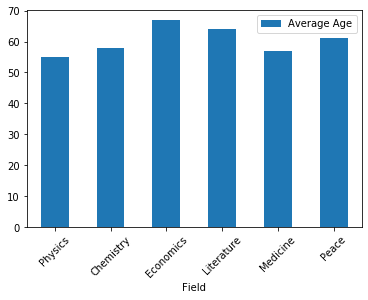

In [78]:
avg_age = [('Physics',phys_avg_age), ('Chemistry', chem_avg_age), ('Economics', econ_avg_age), 
           ('Literature', liter_avg_age), ('Medicine', med_avg_age), ('Peace', peace_avg_age)] 

avg_age_dist = pd.DataFrame(avg_age,columns=['Field', 'Average Age'])

avg_age_dist = avg_age_dist.set_index('Field')
avg_age_dist.plot.bar(rot=45)

Next we would like to investigate who is the first woman to be awarded the nobel prize. And in what year was that, and in what particular field.


In [79]:
#first we get the individuals only.
ind = nobel_cleaned.loc[nobel_cleaned['Laureate Type'] == 0]

#then we get females only.
females = ind[ind['Sex'] == 1]

#then we get lowest year
min_year = females['Year'].min()
first_female = females.loc[females['Year'] == min_year]
first_female

,Year,Motivation,Laureate ID,Laureate Type,Full Name,Birth City,Birth Country,Birth Year,Age,Sex,...,Chemistry,Economics,Literature,Medicine,Peace,Physics,Share 1/1,Share 1/2,Share 1/3,Share 1/4
19,1903,"""in recognition of the extraordinary services ...",6,0,"Marie Curie, née Sklodowska",Warsaw,Russian Empire (Poland),1867.0,36.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


We figure out it's Marie Curie in 1903 at the age of 36 in physics, in recognition of her work on the physiology of digestion, through which knowledge on vital aspects of the subject has been transformed and enlarged.

We next proceed to answer the question of who are the youngest and oldest winners. Starting with the youngest:

In [80]:
#first we get the individuals only.
ind = nobel_cleaned.loc[nobel_cleaned['Laureate Type'] == 0]

min_age = ind['Age'].min()
youngest_winner = ind.loc[ind['Age'] == min_age]

youngest_winner

,Year,Motivation,Laureate ID,Laureate Type,Full Name,Birth City,Birth Country,Birth Year,Age,Sex,...,Chemistry,Economics,Literature,Medicine,Peace,Physics,Share 1/1,Share 1/2,Share 1/3,Share 1/4
852,2014,"""for their struggle against the suppression of...",914,0,Malala Yousafzai,Mingora,Pakistan,1997.0,17.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


The youngest winner was Malala Yousafzai from Pakistan at the age of 17. She was awarded Nobel prize for peace for her struggle against the suppression of children and young people and for the right of all children to education.    
We next search for the oldest winner:

In [81]:
#first we get the individuals only.
ind = nobel_cleaned.loc[nobel_cleaned['Laureate Type'] == 0]

max_age = ind['Age'].max()
oldest_winner = ind.loc[ind['Age'] == max_age]

oldest_winner

,Year,Motivation,Laureate ID,Laureate Type,Full Name,Birth City,Birth Country,Birth Year,Age,Sex,...,Chemistry,Economics,Literature,Medicine,Peace,Physics,Share 1/1,Share 1/2,Share 1/3,Share 1/4
763,2007,"""for having laid the foundations of mechanism ...",820,0,Leonid Hurwicz,Moscow,Russia,1917.0,90.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


The oldest winner was Leonid Hurwicz at the age of 90. He was awarded Nobel prize for Economics for having laid the foundations of mechanism design theory.

Following our aim to answer all the 10 questions, We had to inspect the Motivation column to find the most frequent words. This will give us some insights on what people mostly do to win a nobel prize.

In [82]:
from collections import Counter

#We seperate the Motivation column in a seperate Dataframe
Motivation_column = nobel_cleaned["Motivation"]

#We drop all the rows which holds null values
Motivation_column  = Motivation_column.dropna(how='any',axis=0) 

# Then w apply Method counter that results in an array, at which each instance of that array includes
# a word and counter for each repetition for it.
common_words = Counter('"'.join(Motivation_column.str.lower()).split()).most_common(100)
common_words

[('of', 1100),
 ('the', 1029),
 ('and', 508),
 ('their', 339),
 ('his', 324),
 ('in', 323),
 ('to', 192),
 ('discovery', 187),
 ('for', 157),
 ('discoveries', 154),
 ('concerning', 116),
 ('a', 113),
 ('on', 99),
 ('development', 92),
 ('with', 85),
 ('work', 83),
 ('which', 82),
 ('by', 75),
 ('contributions', 56),
 ('has', 54),
 ('theory', 52),
 ('recognition', 48),
 ('structure', 48),
 ('chemical', 43),
 ('economic', 42),
 ('that', 38),
 ('new', 37),
 ('pioneering', 37),
 ('fundamental', 33),
 ('he', 31),
 ('human', 31),
 ('studies', 30),
 ('its', 29),
 ('analysis', 29),
 ('especially', 28),
 ('methods', 26),
 ('an', 24),
 ('through', 24),
 ('investigations', 24),
 ('research', 22),
 ('as', 22),
 ('genetic', 22),
 ('into', 21),
 ('her', 20),
 ('cell', 20),
 ('invention', 20),
 ('mechanism', 20),
 ('important', 19),
 ('method', 19),
 ('organic', 18),
 ('nuclear', 18),
 ('having', 18),
 ('efforts', 18),
 ('services', 17),
 ('our', 17),
 ('atomic', 17),
 ('elementary', 17),
 ('quantum'

As you can see here, There are a lot of stop words that is repeated in the Motivation column, which is normal, but we need to eliminate all these stop words in order to concentrate more on important words
that will affect our decisions. So we are going to import "nltk" library that includes a lot of dictionaries and words.

In [83]:
#in order to include stopwords in our code we had to use nltk.download() which will open a window for us,
#from which we can use stopwords to download 

# nltk.download()
import nltk
from nltk.corpus import stopwords

#By trial and error, we found that the process of eliminating the stop words from our data
#needs to be done 3 times at least to get rid of all stop words
for i in range(0,3):
    for word in common_words:
        if word[0] in (stopwords.words('english')):
            common_words.remove(word)
common_words

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\hp/nltk_data'
    - 'c:\\users\\hp\\appdata\\local\\programs\\python\\python37-32\\nltk_data'
    - 'c:\\users\\hp\\appdata\\local\\programs\\python\\python37-32\\share\\nltk_data'
    - 'c:\\users\\hp\\appdata\\local\\programs\\python\\python37-32\\lib\\nltk_data'
    - 'C:\\Users\\hp\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


Now our data is clean, we can start follow the process of visualizing It to find the most frequent words

In [ ]:
#We created a dataframe that holds the word and its frequency in 2 separate columns

Most_frequent = pd.DataFrame(common_words,columns=['Word', 'Frequency'])

We don't need all these data now, as we are only searching for the most frequents words, so the first 10 elements are enough

In [ ]:
Most_frequent = Most_frequent.head(10)
Most_frequent

In [ ]:
#We removed the index column and set the Word column to be the index, in order to make the visualization more clear.

Most_frequent = Most_frequent[Most_frequent.Word != '"'].reset_index()
del Most_frequent['index']
Most_frequent = Most_frequent.set_index('Word')
print(Most_frequent)
Most_frequent.plot.bar(rot=0, figsize=(17,8), width=0.8)

Here is a comparison between number of winners working with an organisation vs number of winners not working with an organisation

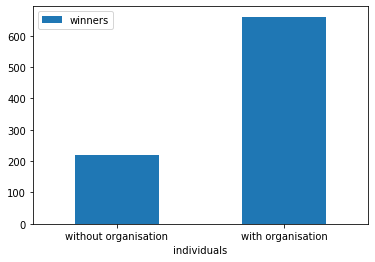

In [85]:
#first we get the individuals only.
ind = nobel_cleaned.loc[nobel_cleaned['Laureate Type'] == 0]

#then we get individuals with no organsiation.
ind_No_organisation = ind['Organization Name'].isnull().sum()

#then we get individuals with organsiation.
ind_organisation = ind[ind['Organization Name'] != 'NaN']
c1=ind_No_organisation
c2=ind_organisation['Organization Name'].count()
#plot the bar chart
df = pd.DataFrame({'individuals':['without organisation', 'with organisation'], 'frequency':[c1, c2]})
df.plot.bar(x='individuals', y='frequency', rot=0)

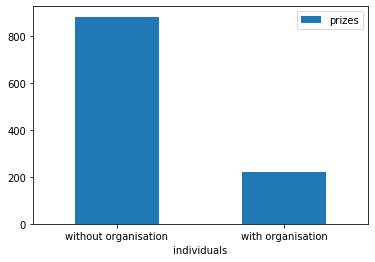

In [103]:
#first we get the individuals only.
ind = nobel_cleaned.loc[nobel_cleaned['Laureate Type'] == 0]

#then we get individuals with no organsiation.
ind_No_organisation = ind[ind['Organization Name'].isnull()]

#then we get individuals with organsiation.
ind_organisation = ind[ind['Organization Name'] != 'NaN']
c1=ind_organisation["Physics"].sum()+ind_organisation["Economics"].sum()+ind_organisation["Chemistry"].sum()+ind_organisation["Literature"].sum()+ind_organisation["Medicine"].sum()+ind_organisation["Peace"].sum()     
c2=ind_No_organisation["Physics"].sum()+ind_No_organisation["Economics"].sum()+ind_No_organisation["Chemistry"].sum()+ind_No_organisation["Literature"].sum()+ind_No_organisation["Medicine"].sum()+ind_No_organisation["Peace"].sum()  
#plot the bar chart
df = pd.DataFrame({'individuals':['without organisation', 'with organisation'], 'prizes':[c1, c2]})
df.plot.bar(x='individuals', y='prizes', rot=0)